In [1]:
use_colab = True
assert use_colab in [True, False]

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### EDA

In [3]:
if use_colab:
    DATASET_PATH='/content/drive/MyDrive/dataset/Animals_10'
else:
    DATASET_PATH='./'

### Split Train & Test Data

In [4]:
import os

dataset_dir = os.path.join(DATASET_PATH) # dataset이 있는 경로



```
img_dir = /content/drive/MyDrive/dataset/Animals_10/raw-img
img_label = /content/drive/MyDrive/dataset/Animals_10/translate.py
```



In [5]:
img_dir = os.path.join(dataset_dir, "raw-img") # ./dataset , train => ./dataset/train
img_label = os.path.join(dataset_dir, "translate.py")  # data_label ..?

In [6]:
dataset_filenames = [os.path.join(img_dir, filename) for filename in os.listdir(img_dir)] # 한줄에서 어떤 함수를 동작시키는 방법
dataset_filenames.sort()

In [7]:
# directory with our training pictures
dataset_scoiattolo_dir = os.path.join(img_dir, 'scoiattolo')
print(dataset_scoiattolo_dir)

dataset_ragno_dir = os.path.join(img_dir, 'ragno')
print(dataset_ragno_dir)

dataset_pecora_dir = os.path.join(img_dir, 'pecora')
print(dataset_pecora_dir)

dataset_mucca_dir = os.path.join(img_dir, 'mucca')
print(dataset_mucca_dir)

dataset_gatto_dir = os.path.join(img_dir, 'gatto')
print(dataset_gatto_dir)

dataset_gallina_dir = os.path.join(img_dir, 'gallina')
print(dataset_gallina_dir)

dataset_farfalla_dir = os.path.join(img_dir, 'farfalla')
print(dataset_farfalla_dir)

dataset_elefante_dir = os.path.join(img_dir, 'elefante')
print(dataset_elefante_dir)

dataset_cavallo_dir = os.path.join(img_dir, 'cavallo')
print(dataset_cavallo_dir)

dataset_cane_dir = os.path.join(img_dir, 'cane')
print(dataset_cane_dir)

/content/drive/MyDrive/dataset/Animals_10/raw-img/scoiattolo
/content/drive/MyDrive/dataset/Animals_10/raw-img/ragno
/content/drive/MyDrive/dataset/Animals_10/raw-img/pecora
/content/drive/MyDrive/dataset/Animals_10/raw-img/mucca
/content/drive/MyDrive/dataset/Animals_10/raw-img/gatto
/content/drive/MyDrive/dataset/Animals_10/raw-img/gallina
/content/drive/MyDrive/dataset/Animals_10/raw-img/farfalla
/content/drive/MyDrive/dataset/Animals_10/raw-img/elefante
/content/drive/MyDrive/dataset/Animals_10/raw-img/cavallo
/content/drive/MyDrive/dataset/Animals_10/raw-img/cane


- Label Data 호출

In [8]:
# Given translation dictionary
translate = {"cane": "dog", "cavallo": "horse", "elefante": "elephant", "farfalla": "butterfly",
             "gallina": "chicken", "gatto": "cat", "mucca": "cow", "pecora": "sheep",
             "scoiattolo": "squirrel", "dog": "cane", "cavallo": "horse", "elephant" : "elefante",
             "butterfly": "farfalla", "chicken": "gallina", "cat": "gatto", "cow": "mucca",
             "ragno": "spider", "squirrel": "scoiattolo"}


- train, test data split

In [9]:
from sklearn.model_selection import train_test_split

# Function to split data for a given class
def split_data(directory):
    # Get the list of all files in the directory
    all_files = os.listdir(directory)

    # Split the data into training and testing sets
    train_files, test_files = train_test_split(all_files, test_size=0.2, random_state=42)

    # Create the full file paths for training and testing sets
    train_data = [os.path.join(directory, file) for file in train_files]
    test_data = [os.path.join(directory, file) for file in test_files]

    return train_data, test_data

In [10]:
# Split data for each class
scoiattolo_train, scoiattolo_test = split_data(dataset_scoiattolo_dir)
ragno_train, ragno_test = split_data(dataset_ragno_dir)
pecora_train, pecora_test = split_data(dataset_pecora_dir)
mucca_train, mucca_test = split_data(dataset_mucca_dir)
gatto_train, gatto_test = split_data(dataset_gatto_dir)
gallina_train, gallina_test = split_data(dataset_gallina_dir)
farfalla_train, farfalla_test = split_data(dataset_farfalla_dir)
elefante_train, elefante_test = split_data(dataset_elefante_dir)
cavallo_train, cavallo_test = split_data(dataset_cavallo_dir)
cane_train, cane_test = split_data(dataset_cane_dir)

- dataset 구성 확인

In [11]:
print('Total scoiattolo images:', len(scoiattolo_train) + len(scoiattolo_test))
print("--")
print('Total ragno images:', len(ragno_train) + len(ragno_test))
print("--")
print('Total pecora images:', len(pecora_train) + len(pecora_test))
print("--")
print('Total mucca images:', len(mucca_train) + len(mucca_test))
print("--")
print('Total gatto images:', len(gatto_train) + len(gatto_test))
print("--")
print('Total gallina images:', len(gallina_train) + len(gallina_test))
print("--")
print('Total farfalla images:', len(farfalla_train) + len(farfalla_test))
print("--")
print('Total elefante images:', len(elefante_train) + len(elefante_test))
print("--")
print('Total cavallo images:', len(cavallo_train) + len(cavallo_test))
print("--")
print('Total cane images:', len(cane_train) + len(cane_test))

Total scoiattolo images: 1872
--
Total ragno images: 4910
--
Total pecora images: 1820
--
Total mucca images: 1866
--
Total gatto images: 1697
--
Total gallina images: 3098
--
Total farfalla images: 2112
--
Total elefante images: 1446
--
Total cavallo images: 2623
--
Total cane images: 4875


- data 확인

In [12]:
# Display examples of data and labels for each class
def display_examples(data, labels, class_name, num_examples=5):
    print(f"Examples for {class_name}:")
    for i in range(min(num_examples, len(data))):
        print(f"Data: {data[i]}, Label: {labels[i]}")


In [13]:
# Display examples for each class
display_examples(scoiattolo_train, [translate['scoiattolo']]*len(scoiattolo_train), 'scoiattolo')

display_examples(ragno_train, [translate['ragno']]*len(ragno_train), 'ragno')

display_examples(pecora_train, [translate['pecora']]*len(pecora_train), 'pecora')

display_examples(mucca_train, [translate['mucca']]*len(mucca_train), 'mucca')

display_examples(gatto_train, [translate['gatto']]*len(gatto_train), 'gatto')

display_examples(gallina_train, [translate['gallina']]*len(gallina_train), 'gallina')

display_examples(farfalla_train, [translate['farfalla']]*len(farfalla_train), 'farfalla')

display_examples(elefante_train, [translate['elefante']]*len(elefante_train), 'elefante')

display_examples(cavallo_train, [translate['cavallo']]*len(cavallo_train), 'cavallo')

display_examples(cane_train, [translate['cane']]*len(cane_train), 'cane')

Examples for scoiattolo:
Data: /content/drive/MyDrive/dataset/Animals_10/raw-img/scoiattolo/OIP-KJbsVy1dSXaKIZz030DhowHaE8.jpeg, Label: squirrel
Data: /content/drive/MyDrive/dataset/Animals_10/raw-img/scoiattolo/OIP-KSeAjN-YTXtBDgz0xlvL8AHaFj.jpeg, Label: squirrel
Data: /content/drive/MyDrive/dataset/Animals_10/raw-img/scoiattolo/OIP-yHTeNq9R8DDfsXFXfI7w8gHaFc.jpeg, Label: squirrel
Data: /content/drive/MyDrive/dataset/Animals_10/raw-img/scoiattolo/OIP-reAyPzESzYZZTRIQwH1xuwHaE8.jpeg, Label: squirrel
Data: /content/drive/MyDrive/dataset/Animals_10/raw-img/scoiattolo/OIP-PMrQqXLFEda8ghJfZODlBAHaE7.jpeg, Label: squirrel
Examples for ragno:
Data: /content/drive/MyDrive/dataset/Animals_10/raw-img/ragno/OIP-NG-YoGbDU3z8d48uwtAeSgHaFf.jpeg, Label: spider
Data: /content/drive/MyDrive/dataset/Animals_10/raw-img/ragno/OIP-6YwDuJeCeR2yjrDdCptdeAHaFj.jpeg, Label: spider
Data: /content/drive/MyDrive/dataset/Animals_10/raw-img/ragno/OIP-fi-X4s4Ft1f6Rh8SGXUp5gHaKY.jpeg, Label: spider
Data: /content/d

In [14]:
# Display examples for each class in the test set
display_examples(scoiattolo_test, [translate['scoiattolo']]*len(scoiattolo_test), 'scoiattolo')

display_examples(ragno_test, [translate['ragno']]*len(ragno_test), 'ragno')

display_examples(pecora_test, [translate['pecora']]*len(pecora_test), 'pecora')

display_examples(mucca_test, [translate['mucca']]*len(mucca_test), 'mucca')

display_examples(gatto_test, [translate['gatto']]*len(gatto_test), 'gatto')

display_examples(gallina_test, [translate['gallina']]*len(gallina_test), 'gallina')

display_examples(farfalla_test, [translate['farfalla']]*len(farfalla_test), 'farfalla')

display_examples(elefante_test, [translate['elefante']]*len(elefante_test), 'elefante')

display_examples(cavallo_test, [translate['cavallo']]*len(cavallo_test), 'cavallo')

display_examples(cane_test, [translate['cane']]*len(cane_test), 'cane')


Examples for scoiattolo:
Data: /content/drive/MyDrive/dataset/Animals_10/raw-img/scoiattolo/OIP-Tdb0JYARtIeMroK3agFr8QHaE8.jpeg, Label: squirrel
Data: /content/drive/MyDrive/dataset/Animals_10/raw-img/scoiattolo/OIP-0GZlVDOLvJ6v3ypXwXcykQHaEK.jpeg, Label: squirrel
Data: /content/drive/MyDrive/dataset/Animals_10/raw-img/scoiattolo/OIP-ISLu8dS1vokebUoUB40XRQHaE2.jpeg, Label: squirrel
Data: /content/drive/MyDrive/dataset/Animals_10/raw-img/scoiattolo/OIP-JlPiLelmUB7IxaSRxKvDNAHaGR.jpeg, Label: squirrel
Data: /content/drive/MyDrive/dataset/Animals_10/raw-img/scoiattolo/OIP-O7mU8UVjJ7_zE0r8X932GwHaE8.jpeg, Label: squirrel
Examples for ragno:
Data: /content/drive/MyDrive/dataset/Animals_10/raw-img/ragno/OIP-e8qNiF8Wvmqb-k9kucrzfAHaF4.jpeg, Label: spider
Data: /content/drive/MyDrive/dataset/Animals_10/raw-img/ragno/OIP-_yUqpEJovWvPJuMF3oWJowHaF3.jpeg, Label: spider
Data: /content/drive/MyDrive/dataset/Animals_10/raw-img/ragno/OIP-DaStwTnJ0WpCQArjGiZtRwHaFV.jpeg, Label: spider
Data: /content/d

- 이제 나눈 train data, test data 끼리 병합합니다.

In [15]:
# Concatenate data for training and testing
train_data = scoiattolo_train + ragno_train + pecora_train + mucca_train + gatto_train + \
             gallina_train + farfalla_train + elefante_train + cavallo_train + cane_train

test_data = scoiattolo_test + ragno_test + pecora_test + mucca_test + gatto_test + \
            gallina_test + farfalla_test + elefante_test + cavallo_test + cane_test

- train, test dataset 확인

In [16]:
num_train_examples = len(train_data)
num_test_examples = len(test_data)

print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples: {}".format(num_test_examples))

Number of training examples: 21051
Number of test examples: 5268


- label화

### 하이퍼파라미터 설정

* 모델 학습을 위한 하이퍼파라미터를 설정한다.
* 하이퍼파라미터는 학습에 중요한 역할을 하기 때문에 신중히 설정해야된다.

* 이미지 resize = 데이터를 같은 사이즈로 정제해서 정확도 높임
(224 * 224 size)

In [17]:
batch_size = 32
epochs = 20
IMG_HEIGHT = 224
IMG_WIDTH = 224


- img 확인


In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# 데이터셋에 저장된 이미지를 출력하는 함수
# 이미지 확인을 위해 사용한다.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [19]:
# Generator for our training data
image_gen_train = ImageDataGenerator(rescale=1./255,
                                     rotation_range=0.1,
                                     width_shift_range=0.1,
                                     height_shift_range=0.1,
                                     zoom_range=0.1,
                                     horizontal_flip=True,
                                     vertical_flip=False)

In [20]:
import pandas as pd

# train_data를 사용하여 Pandas DataFrame 생성
df_train = pd.DataFrame(train_data, columns=['file_path'])
df_train['class'] = df_train['file_path'].apply(lambda x: x.split('/')[-2])  # 클래스 정보 추출

In [21]:
# class_mode에 따라 dataloader가 자동으로 결정 (여기서는 class가 여러개 이므로 뭘로 지정?-categorial로 지정)
# flow_from_dataframe 함수를 사용하여 훈련 데이터셋 생성
train_data_gen = image_gen_train.flow_from_dataframe(
    dataframe=df_train,
    batch_size=32,
    x_col='file_path',
    y_col='class',
    shuffle=True,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='categorical'  # 다중 클래스 분류인 경우 'categorical'로 설정
)

Found 21051 validated image filenames belonging to 10 classes.


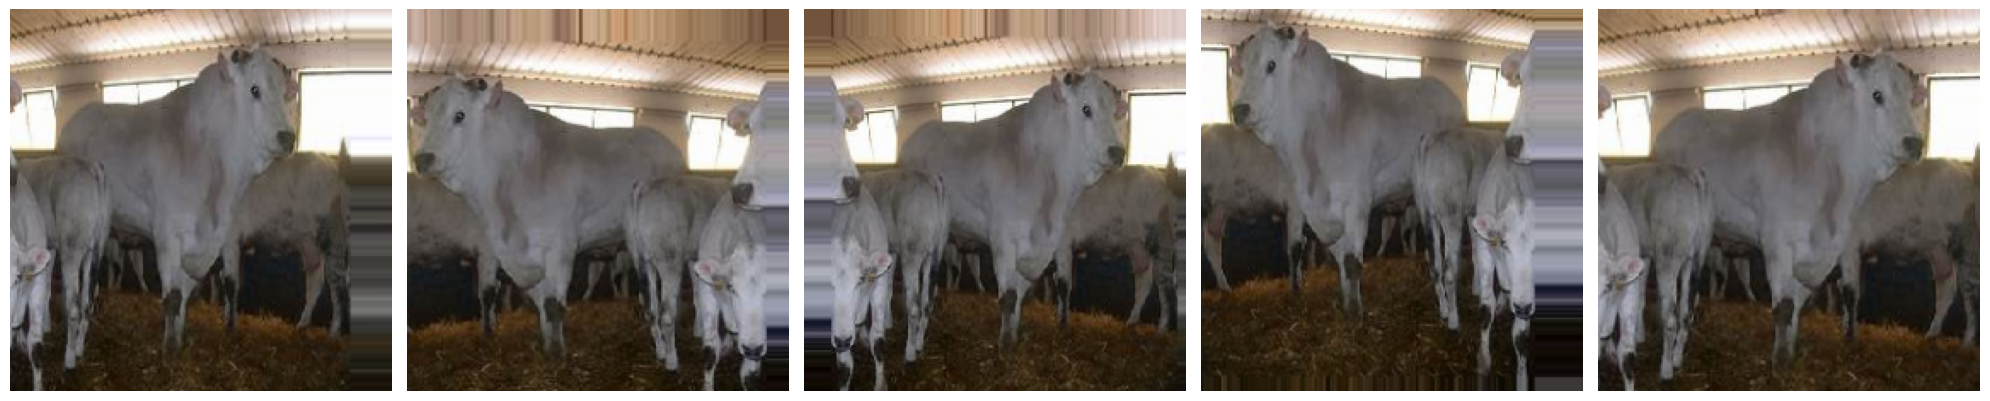

In [22]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [23]:
# test_data를 사용하여 Pandas DataFrame 생성
df_test = pd.DataFrame(test_data, columns=['file_path'])
df_test['class'] = df_test['file_path'].apply(lambda x: x.split('/')[-2])  # 클래스 정보 추출

In [24]:
# Generator for our validation data
image_gen_val = ImageDataGenerator(rescale=1./255)

In [25]:
# flow_from_dataframe 함수를 사용하여 테스트 데이터셋 생성 (라벨 없음)
test_data_gen = image_gen_train.flow_from_dataframe(
    dataframe=df_test,
    batch_size=32,
    x_col='file_path',
    y_col='class',
    shuffle=False,  # 테스트 데이터셋은 shuffle=False로 설정
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='categorical'  # 라벨이 없음을 나타내기 위해 class_mode=None으로 설정
)

Found 5268 validated image filenames belonging to 10 classes.


- img sample 확인

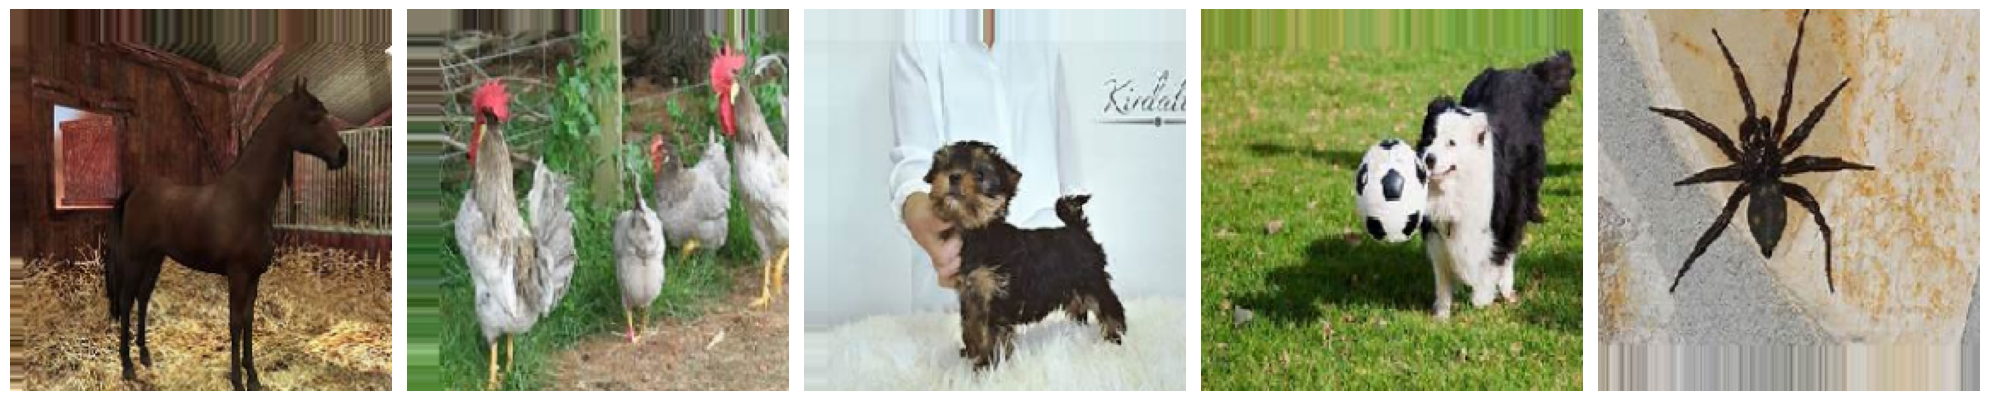

In [26]:
sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])

In [27]:
_[:5] # 정답 데이터

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [28]:
# Given translation dictionary (label Data 확인)
translate = {"cane": "dog", "cavallo": "horse", "elefante": "elephant", "farfalla": "butterfly",
             "gallina": "chicken", "gatto": "cat", "mucca": "cow", "pecora": "sheep",
             "scoiattolo": "squirrel", "dog": "cane", "cavallo": "horse", "elephant" : "elefante",
             "butterfly": "farfalla", "chicken": "gallina", "cat": "gatto", "cow": "mucca",
             "ragno": "spider", "squirrel": "scoiattolo"}

# Reverse the translation dictionary to get the mapping from label to number
label_to_number = {label: i for i, label in enumerate(translate.values())}

print(label_to_number)


{'dog': 0, 'horse': 1, 'elephant': 2, 'butterfly': 3, 'chicken': 4, 'cat': 5, 'cow': 6, 'sheep': 7, 'squirrel': 8, 'cane': 9, 'elefante': 10, 'farfalla': 11, 'gallina': 12, 'gatto': 13, 'mucca': 14, 'spider': 15, 'scoiattolo': 16}


- Model (test)

In [29]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization, ReLU, GlobalAveragePooling2D
from tensorflow.keras import layers

In [30]:
# BaseLine of Subclassing (Conv2DModel & Skip Connection)

class Dense(tf.keras.Model):
    def __init__(self, num_nodes=512):
        super(Dense, self).__init__()
        self.dense = layers.Dense(num_nodes)
        self.bn = layers.BatchNormalization()

    def call(self, inputs, training=True):
        x = self.dense(inputs)
        x = self.bn(x, training=training)
        x = tf.nn.relu(x)
        if training:
            x = tf.nn.dropout(x, rate=0.5)
        return x

class Conv2DModel(tf.keras.Model):
    def __init__(self, num_nodes=512, num_classes=10) :
        super(Conv2DModel, self).__init__()
        self.conv1 = layers.Conv2D(64, (3, 3), activation=None, padding='same')
        self.skip1 = layers.Conv2D(64, (3, 3), strides=2, padding='same', activation=None)
        self.conv2 = layers.Conv2D(128, (3, 3), activation=None, padding='same')
        self.skip2 = layers.Conv2D(128, (3, 3), strides=2, padding='same', activation=None)
        # 추가적인 Conv2D 레이어와 MaxPooling 레이어를 여기에 정의할 수 있습니다.
        self.flatten = layers.Flatten()
        self.fc = Dense(num_nodes)

        # 마지막 Dense 레이어를 클래스 수에 맞게 조정하고 softmax 활성화 함수 사용
        self.outputs = layers.Dense(num_classes, activation='softmax')

    def call(self, inputs, training=True):
        # 첫 번째 convolutional 블록
        x = self.conv1(inputs)
        x = tf.nn.relu(x)
        x = layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x)
        skip_connection1 = self.skip1(inputs)  # Skip connection 준비

        # 두 텐서를 더하기 전에 형상을 일치시킵니다.
        x = layers.add([x, skip_connection1])  # Skip connection 적용
        x = tf.nn.relu(x)  # Skip connection 후 활성화 함수 적용

        # 두 번째 convolutional 블록
        x = self.conv2(x)
        x = tf.nn.relu(x)
        x = layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x)
        skip_connection2 = self.skip2(skip_connection1)  # Skip connection 준비

        # 두 텐서를 더하기 전에 형상을 일치시킵니다.
        x = layers.add([x, skip_connection2])  # Skip connection 적용
        x = tf.nn.relu(x)  # Skip connection 후 활성화 함수 적용

        # 추가 Conv2D와 MaxPooling 레이어의 forward pass를 여기에 구현합니다.

        x = self.flatten(x)
        x = self.fc(x, training=training)
        x = self.outputs(x)
        return x

# 모델 인스턴스 생성, 클래스 개수를 인자로 전달
model = Conv2DModel(num_classes=10)

- Model Compile

In [31]:
optimizer=tf.keras.optimizers.Adam(1e-4) # learning rate
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False), # categorical_crossentropy => from_logits=False 고정
              optimizer=optimizer, # 다중분류니까 CategoricalCrossentropy 사용.
              metrics=['accuracy'])

# 모델 학습 진행
* 학습을 진행할때, train과 valid 데이터셋을 이용하여 학습과 검증을 동시에 진행합니다.
* 각 데이터셋은 위에서 구성했기 때문에, 모델에서 사용할 데이터의 step의 길이를 batch_size를 이용해 계산해줍니다.

In [32]:
# the save point
if use_colab:
    checkpoint_dir ='./drive/My Drive/train_ckpt/animalclassification/exp1'
    if not os.path.isdir(checkpoint_dir):
        os.makedirs(checkpoint_dir)
else:
    checkpoint_dir = 'animalclassification/exp1'

cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_dir,
                                                 save_weights_only=True,
                                                 monitor='val_loss',
                                                 mode='auto',
                                                 save_best_only=True,
                                                 verbose=1)
#early stopping
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10,
                                                     monitor='val_loss',
                                                     restore_best_weights=True,
                                                     verbose=1)

In [ ]:
#model.load_weights(checkpoint_dir) # 모델이 완전히 같은 모양일 때만 동작합니다.

history = model.fit(
    train_data_gen,  # 훈련 데이터 제너레이터
    steps_per_epoch=len(train_data) // batch_size,  # 전체 훈련 샘플 수 // 배치 크기
    epochs=epochs,
    validation_data=test_data_gen,  # 검증 데이터 제너레이터
    validation_steps=len(test_data) // batch_size,  # 전체 검증 샘플 수 // 배치 크기
    callbacks=[cp_callback]
)


Epoch 1/20
657/657 [==============================] - ETA: 0s - loss: 2.0172 - accuracy: 0.3556
Epoch 1: val_loss improved from inf to 1.79905, saving model to ./drive/My Drive/train_ckpt/animalclassification/exp1
657/657 [==============================] - 5475s 8s/step - loss: 2.0172 - accuracy: 0.3556 - val_loss: 1.7991 - val_accuracy: 0.4192
Epoch 2/20
657/657 [==============================] - ETA: 0s - loss: 1.6032 - accuracy: 0.4680
Epoch 2: val_loss improved from 1.79905 to 1.63157, saving model to ./drive/My Drive/train_ckpt/animalclassification/exp1
657/657 [==============================] - 629s 957ms/step - loss: 1.6032 - accuracy: 0.4680 - val_loss: 1.6316 - val_accuracy: 0.4716
Epoch 3/20
657/657 [==============================] - ETA: 0s - loss: 1.4235 - accuracy: 0.5242
Epoch 3: val_loss improved from 1.63157 to 1.31506, saving model to ./drive/My Drive/train_ckpt/animalclassification/exp1
657/657 [==============================] - 613s 934ms/step - loss: 1.4235 - accura

- 평가 결과 확인

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()